<a href="https://colab.research.google.com/github/Alyssonfst/DesafioML-BAJA-SAE/blob/main/velocidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

base_dados = base_dados = pd.read_excel('anonymizedData.xlsx', sheet_name=0)

base_dados = base_dados.drop(['DP_Entre-Eixo', 'DP_Bitola Dianteira', 'DP_Bitola Traseira', 'DP_Altura', 'DP_Comprimento', 'DP_Altura do CG com relacao ao chao',
                              'DMV_Lado Direito', 'PCG_X', 'PCG_Y', 'PCG_Z', 'SD_Curso Positivo de projeto', 'SD_Curso Negativo de projeto', 'SD_Cambagem estatica', 'SD_Convergência estatica', 'ST_Curso Positivo de projeto', 'ST_Curso Negativo de projeto', 'ST_Cambagem estatica', 'ST_Convergência estatica', 'D_Relacao', 'D_Curso total da cremalheira', 'D_Inclinacao do pino mestre', 'D_Angulo de caster', 'FD_Pressao no sistema a 07g ', 'FD_Forca no pedal a 07g ', 'FD_Curso total do pedal ', 'FD_Diametro do disco ', 'FT_Pressao no sistema a 07g ', 'FT_Diametro do disco ', 'CD_Raio mínimo de curva do protótipo', 'CD_Velocidade crítica para uma curva de raio de 10 m', 'CD_Distancia de frenagem de 35 a 0 em asfalto', 'CD_Distancia de frenagem de 35 a 0 em terra batida', 'CD_Ganho de rolagem por aceleracao lateral',
                              'CD_Ganho de arfagem em aceleracao longitudinal', 'CD_Ganho de arfagem em desaceleracao longitudinal', 'DMV_Dianteira', 'SD_Dimensoes dos pneus', 'ST_Dimensoes dos pneus',
                              'MT_Relacao total_min','MT_Potência maxima do motor','MT_Torque maximo do motor', 'CD_Tempo para atingir velocidade maxima em asfalto', 'CD_Tempo para atingir velocidade maxima em terra batida'], axis=1)

base_dados['Massa Total'] = base_dados['MV_Eixo dianteiro'] + base_dados['MV_Eixo Traseiro']
base_dados = base_dados.drop(['MV_Eixo dianteiro', 'MV_Eixo Traseiro'], axis=1)


base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   MT_Relacao total_max                                     927 non-null    float64
 1   CD_Velocidade maxima de 0 a 100 metros em asfalto        545 non-null    float64
 2   CD_Velocidade maxima de 0 a 100 metros em terra batida   433 non-null    float64
 3   P_Velocidade Final                                       1000 non-null   int64  
 4   Massa Total                                              953 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [ ]:
colunas_velocidade = [
    'CD_Velocidade maxima de 0 a 100 metros em asfalto ', 'CD_Velocidade maxima de 0 a 100 metros em terra batida ']

# Excluir linhas que não possuem valores em ambas as colunas de velocidade
base_dados = base_dados.dropna(subset=colunas_velocidade, how='any')
base_dados.info()

valores_nulos_por_coluna = base_dados.isnull().sum()

print(valores_nulos_por_coluna)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 989
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   MT_Relacao total_max                                     376 non-null    float64
 1   CD_Velocidade maxima de 0 a 100 metros em asfalto        383 non-null    float64
 2   CD_Velocidade maxima de 0 a 100 metros em terra batida   383 non-null    float64
 3   P_Velocidade Final                                       383 non-null    int64  
 4   Massa Total                                              383 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 18.0 KB
MT_Relacao total_max                                       7
CD_Velocidade maxima de 0 a 100 metros em asfalto          0
CD_Velocidade maxima de 0 a 100 metros em terra batida     0
P_Velocidade Final                                         0

<Axes: xlabel='P_Velocidade Final', ylabel='CD_Velocidade maxima de 0 a 100 metros em terra batida '>

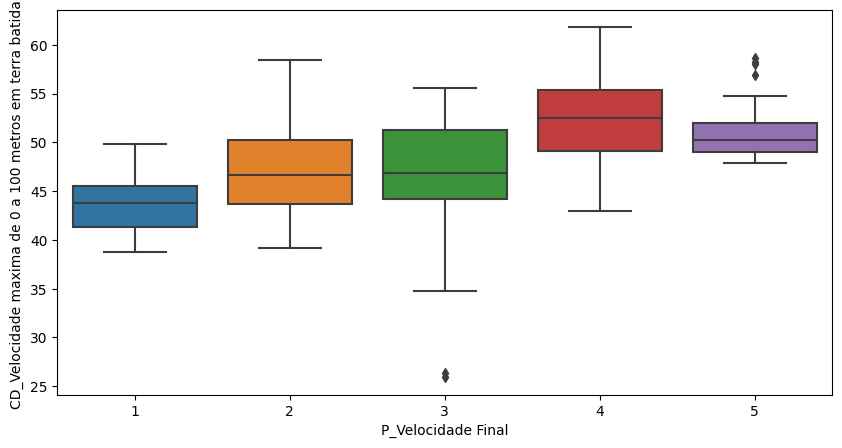

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='CD_Velocidade maxima de 0 a 100 metros em terra batida ')

<Axes: xlabel='P_Velocidade Final', ylabel='CD_Velocidade maxima de 0 a 100 metros em asfalto '>

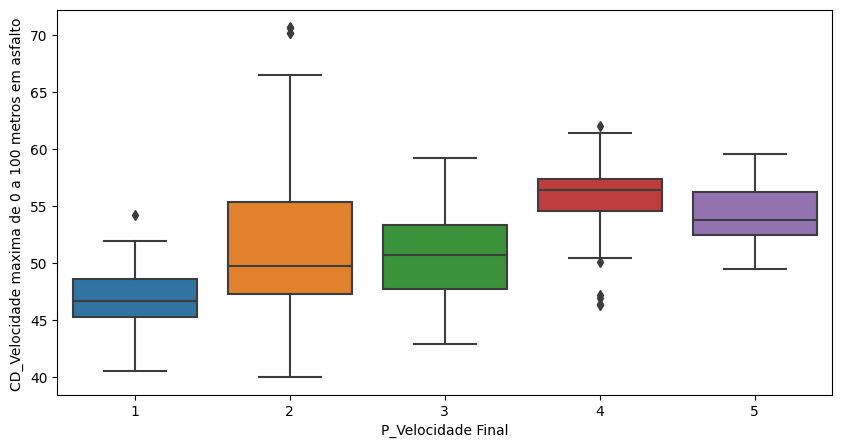

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='CD_Velocidade maxima de 0 a 100 metros em asfalto ')

<Axes: xlabel='P_Velocidade Final', ylabel='MT_Relacao total_max'>

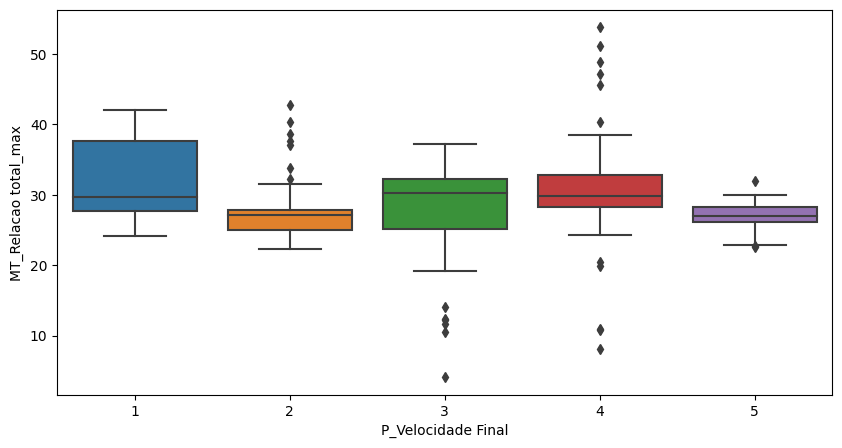

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='MT_Relacao total_max')

<Axes: xlabel='P_Velocidade Final', ylabel='Massa Total'>

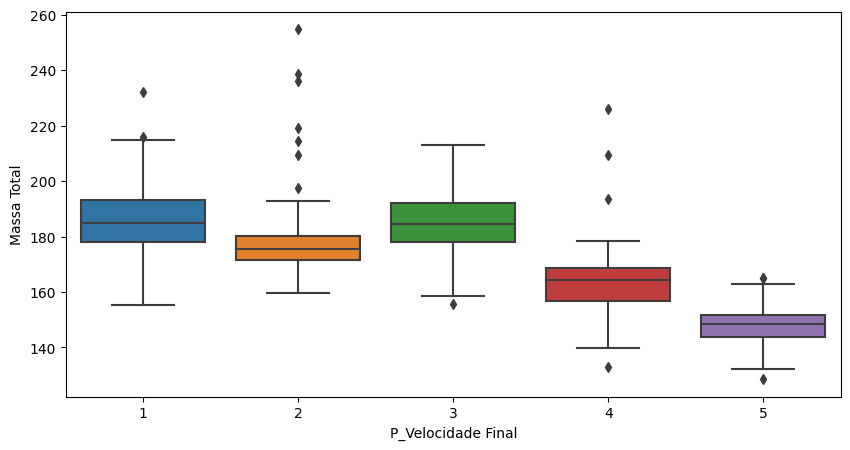

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='Massa Total')

In [ ]:
base_dados = base_dados.dropna(subset=['MT_Relacao total_max'])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0:2, 4]])
y_train = np.array(base_dados['P_Velocidade Final'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.7,random_state=30)

modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=30)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')


Acurácia do modelo de Random Forest: 0.74


In [ ]:
# Calcule os quartis e o intervalo interquartil (IQR)
Q1 = base_dados[base_dados['P_Velocidade Final'] == 2]['CD_Velocidade maxima de 0 a 100 metros em asfalto '].quantile(0.25)
Q3 = base_dados[base_dados['P_Velocidade Final'] == 2]['CD_Velocidade maxima de 0 a 100 metros em asfalto '].quantile(0.75)
IQR = Q3 - Q1

# Calcule os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecione os índices dos outliers para P_Aceleracao igual a 5
outliers_index = base_dados[(base_dados['P_Velocidade Final'] == 2) &
                            ((base_dados['CD_Velocidade maxima de 0 a 100 metros em asfalto '] < lower_bound) |
                             (base_dados['CD_Velocidade maxima de 0 a 100 metros em asfalto '] > upper_bound))].index

# Remova os dados considerados outliers para P_Aceleracao igual a 5
base_dados.drop(outliers_index, inplace=True)


<Axes: xlabel='P_Velocidade Final', ylabel='CD_Velocidade maxima de 0 a 100 metros em asfalto '>

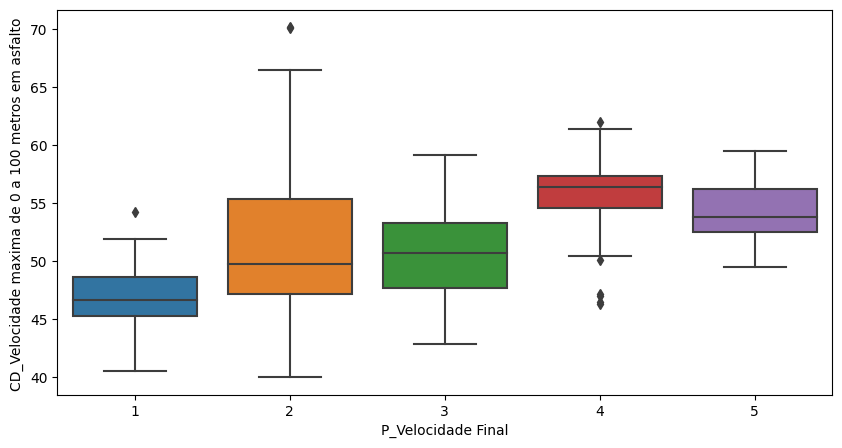

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='CD_Velocidade maxima de 0 a 100 metros em asfalto ')

In [ ]:
# Calcule os quartis e o intervalo interquartil (IQR)
Q1 = base_dados[base_dados['P_Velocidade Final'] == 3]['CD_Velocidade maxima de 0 a 100 metros em terra batida '].quantile(0.25)
Q3 = base_dados[base_dados['P_Velocidade Final'] == 3]['CD_Velocidade maxima de 0 a 100 metros em terra batida '].quantile(0.75)
IQR = Q3 - Q1

# Calcule os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecione os índices dos outliers para P_Aceleracao igual a 5
outliers_index = base_dados[(base_dados['P_Velocidade Final'] == 3) &
                            ((base_dados['CD_Velocidade maxima de 0 a 100 metros em terra batida '] < lower_bound) |
                             (base_dados['CD_Velocidade maxima de 0 a 100 metros em terra batida '] > upper_bound))].index

# Remova os dados considerados outliers para P_Aceleracao igual a 5
base_dados.drop(outliers_index, inplace=True)


<Axes: xlabel='P_Velocidade Final', ylabel='CD_Velocidade maxima de 0 a 100 metros em terra batida '>

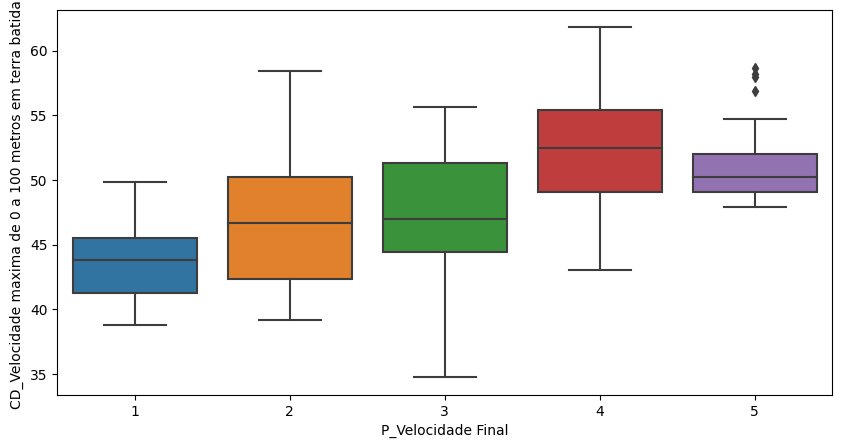

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='CD_Velocidade maxima de 0 a 100 metros em terra batida ')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0:2, 4]])
y_train = np.array(base_dados['P_Velocidade Final'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.7,random_state=30)

modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=30)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')


Acurácia do modelo de Random Forest: 0.74


In [ ]:
base_dados

,MT_Relacao total_max,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,P_Velocidade Final,Massa Total
0,25.470433,45.267951,39.051027,1,195.098353
3,26.845420,40.524918,41.235969,1,204.727982
6,27.373695,50.510217,44.208372,1,189.673715
7,36.310984,44.067467,39.542667,1,184.874907
14,28.461358,46.519407,43.533175,1,192.286190
...,...,...,...,...,...
977,27.972523,51.920456,48.838351,5,157.085921
978,25.074372,59.547031,53.212777,5,150.717637
983,26.988585,55.363937,49.858673,5,145.025197
986,28.631594,52.525865,48.388377,5,150.171176


In [ ]:
indices_para_remover = [502, 594, 433, 520, 559, 550, 562]

# Remover as linhas pelos índices especificados
base_dados.drop(indices_para_remover, inplace=True)


<Axes: xlabel='P_Velocidade Final', ylabel='CD_Velocidade maxima de 0 a 100 metros em terra batida '>

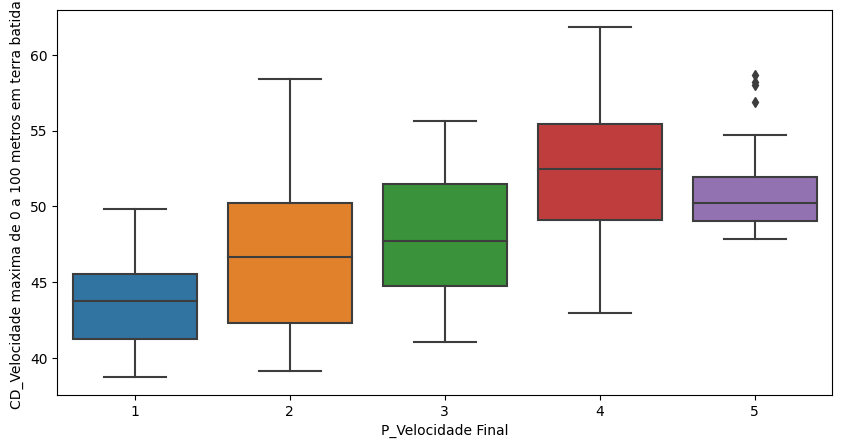

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='CD_Velocidade maxima de 0 a 100 metros em terra batida ')

<Axes: xlabel='P_Velocidade Final', ylabel='CD_Velocidade maxima de 0 a 100 metros em asfalto '>

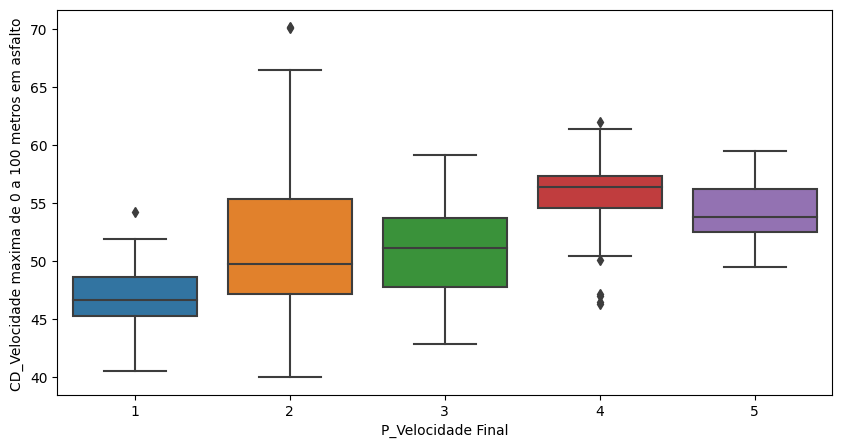

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Velocidade Final', y='CD_Velocidade maxima de 0 a 100 metros em asfalto ')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0:3, 4]])
y_train = np.array(base_dados['P_Velocidade Final'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.65,random_state=37)

modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=12)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')


Acurácia do modelo de Random Forest: 0.83


In [ ]:
import numpy as np

x_novos = np.array([24,49,45.2,188.9])
x_novos = x_novos.reshape(1, -1)

previsoes_novos_dados = modelo_rf.predict(x_novos)

print(previsoes_novos_dados)

[1]


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 989
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   MT_Relacao total_max                                     366 non-null    float64
 1   CD_Velocidade maxima de 0 a 100 metros em asfalto        366 non-null    float64
 2   CD_Velocidade maxima de 0 a 100 metros em terra batida   366 non-null    float64
 3   P_Velocidade Final                                       366 non-null    int64  
 4   Massa Total                                              366 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 17.2 KB


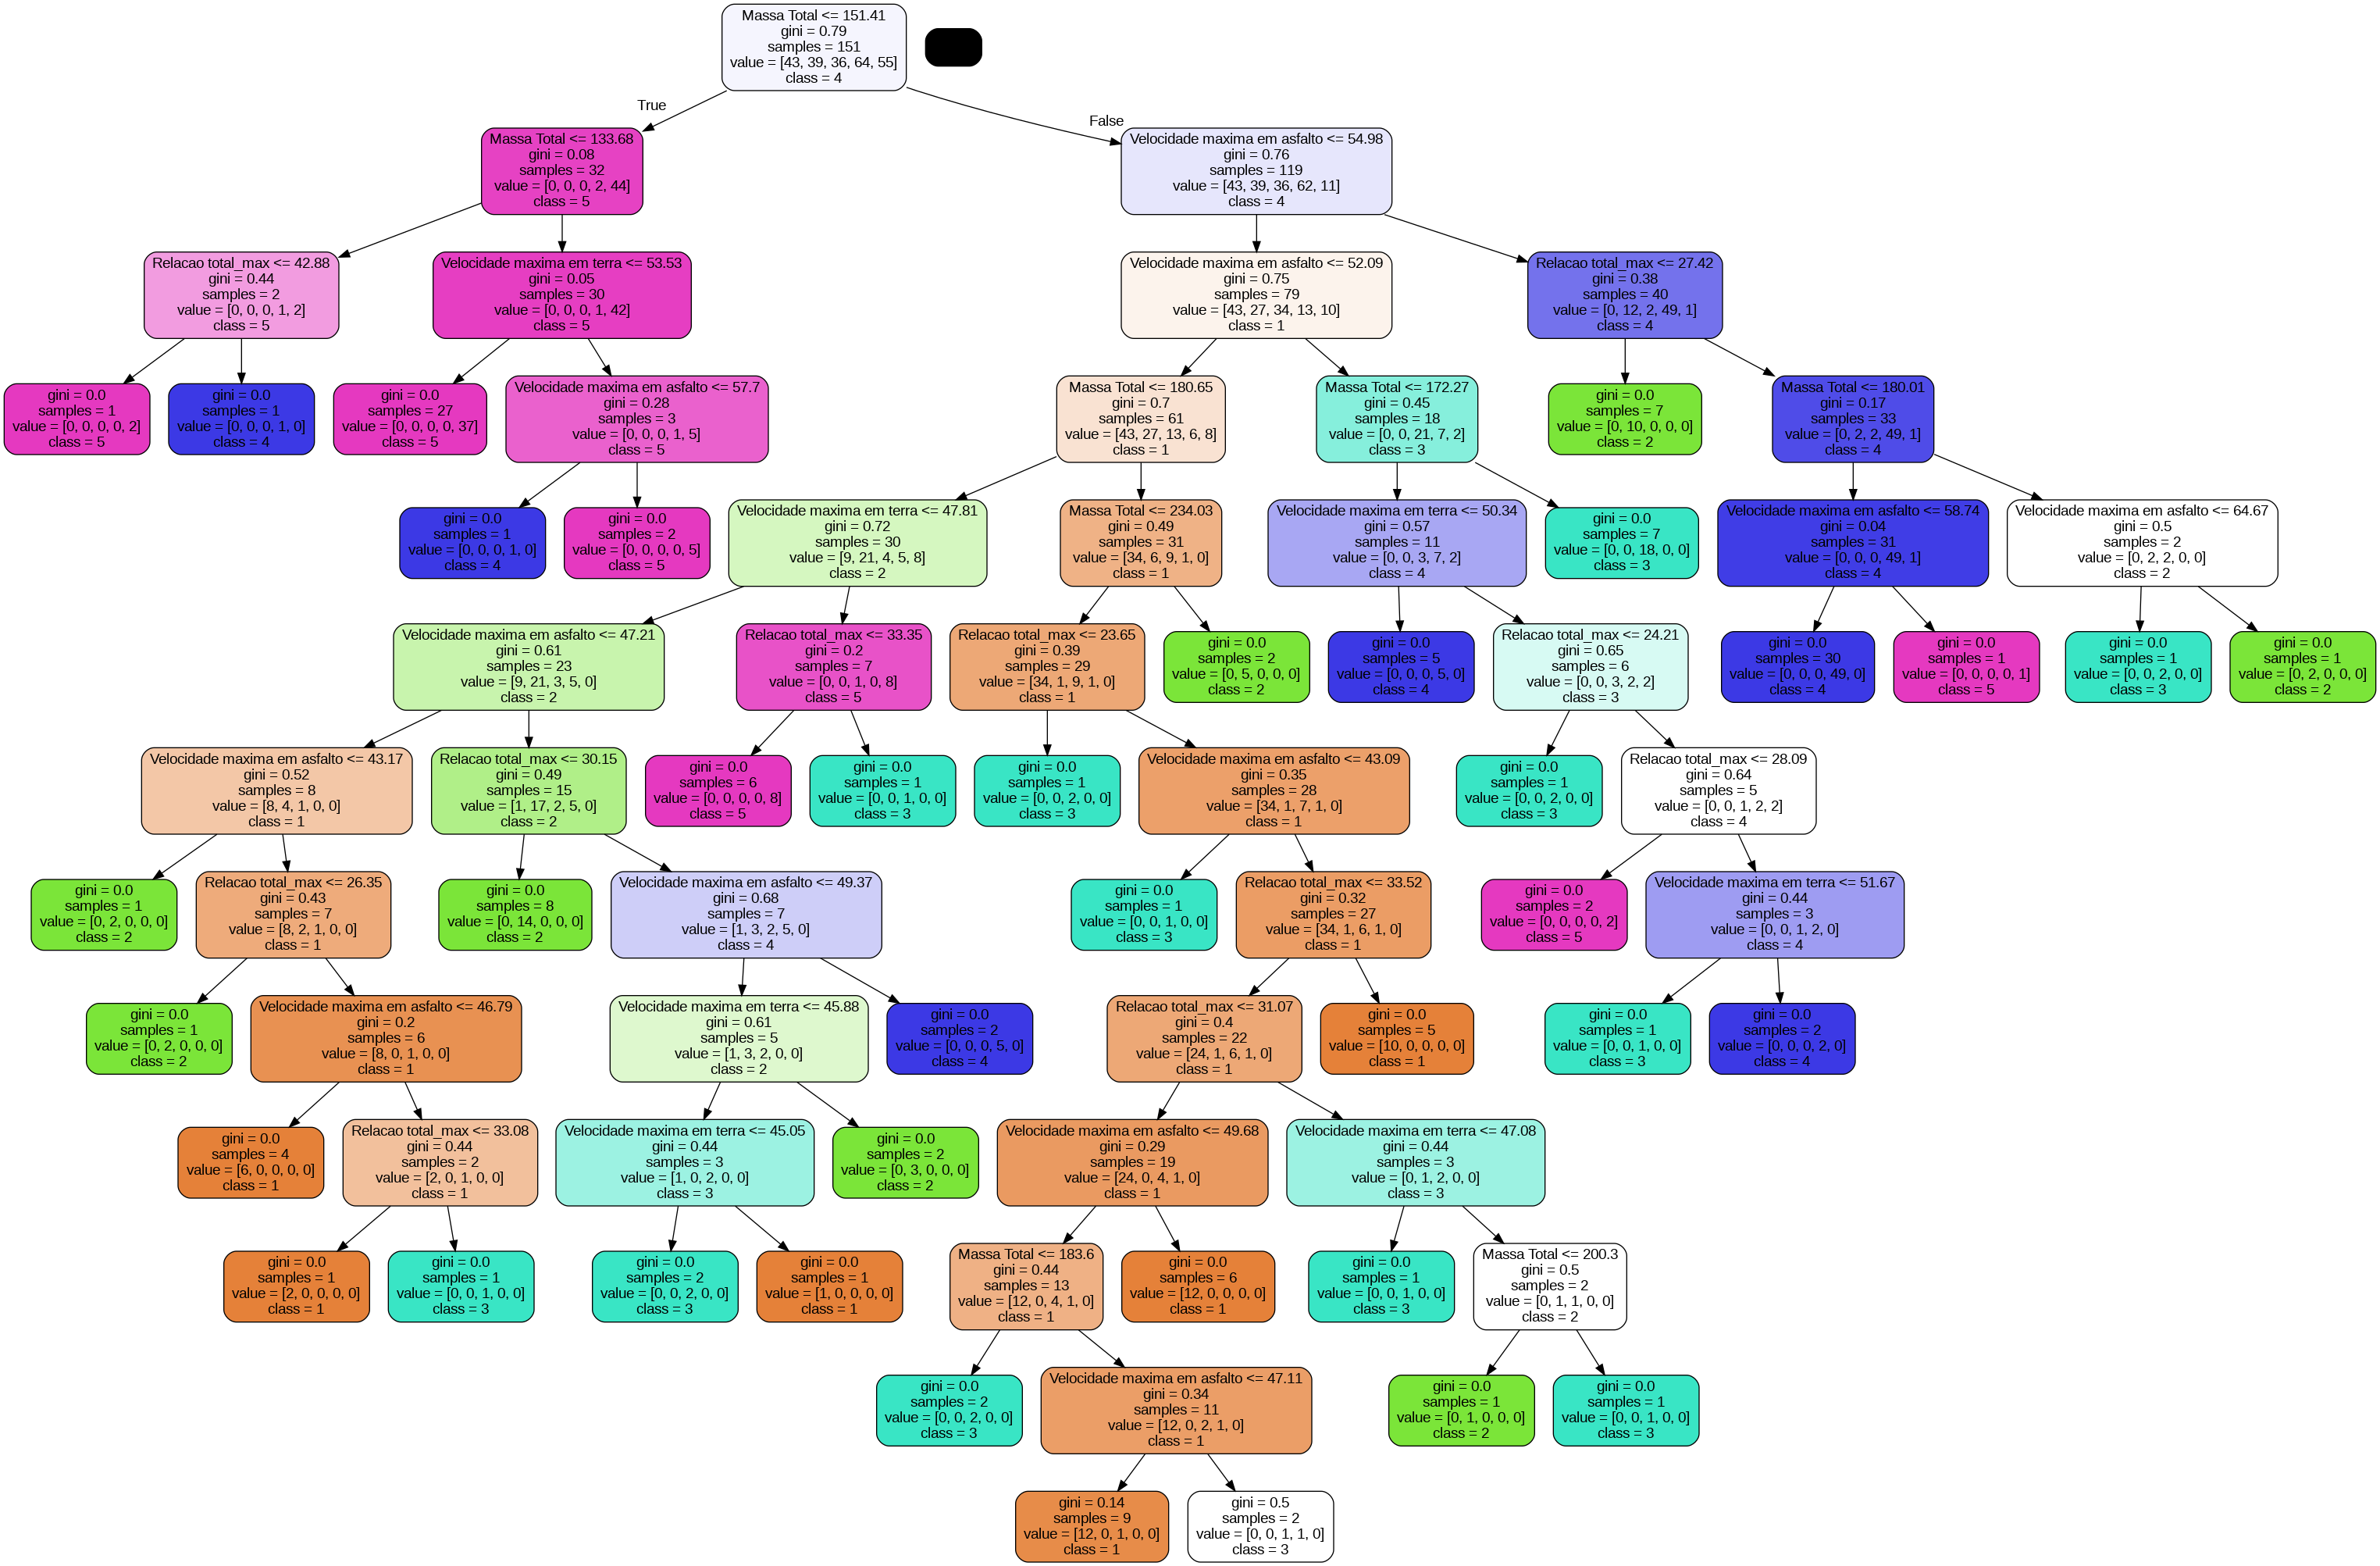

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Substitua o número do índice (0 neste caso) pelo número da árvore que deseja visualizar
estimator = modelo_rf.estimators_[0]

# Exporte a árvore para um arquivo .dot
export_graphviz(estimator, out_file='tree.dot',
                feature_names=['Relacao total_max', 'Velocidade maxima em asfalto', 'Velocidade maxima em terra','Massa Total'],  # Substitua pelos nomes das suas colunas
                class_names=['1', '2', '3', '4', '5'],  # Substitua pelas classes do seu modelo
                rounded=True, proportion=False,
                precision=2, filled=True)

# Converta o arquivo .dot para um formato legível
graph = pydotplus.graph_from_dot_file('tree.dot')

# Mostre a árvore
Image(graph.create_png())


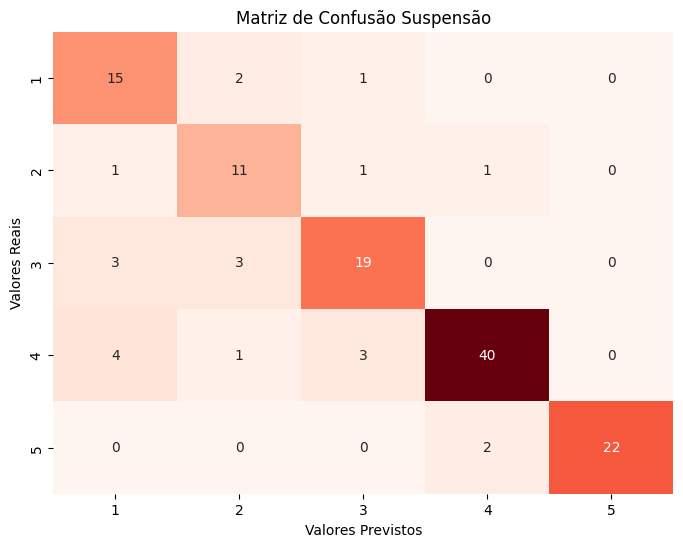

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
matriz_confusao = confusion_matrix(y_val, predicoes)

# Defina as classes reais e previstas
classes = ['1', '2', '3', '4', '5']

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Reds', fmt='g', cbar=False, xticklabels=classes, yticklabels=classes)

plt.title('Matriz de Confusão Suspensão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()
